# Frequency Domain Plotting

In this lesson, we're going to learn about a more advanced tool for plotting signals in the frequency domain. Up until now, we have just been plotting the FFT of a signal in much the same way we plot time-domain signals. But as you'll soon see, this can sometimes be misleading.

### Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Make Signal

Let's make a signal whose frequency components change over time.

In [2]:
fs = 200
T = 120
f0, f1 = 0, 10
ts = np.arange(0, T, 1/fs)
c = (f1 - f0) / T
sig = np.sin(2 * np.pi * (c / 2 * np.square(ts) + f0 * ts))

This signal is a sine wave that starts off at 0 Hz and slowly starts to increase in frequency up to 10 Hz.

In [3]:
%matplotlib inline

Text(0.5,0,'Time (sec)')

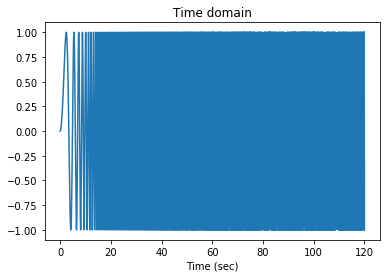

In [4]:
plt.clf()
plt.title('Time domain')
plt.plot(ts, sig)
plt.xlabel('Time (sec)')

### Entire FFT

Let's take a look at this signal in the frequency domain as we normally would.

In [5]:
fft = np.fft.rfft(sig)
freq = np.fft.rfftfreq(len(sig), 1/fs)

We can easily see that this signal has lots of energy between 0 and 10 Hz and not much else outside of that. While this is correct, it doesn't really tell us that much about the signal. By just looking at the FFT, we don't know that it starts off at 0 Hz and ramps up to 10 Hz. It could just as easily have started off at 10 Hz and gone to 0 Hz. Or it could have had all frequency components from 0 - 10 Hz at all times.

Text(0.5,0,'Frequency (Hz)')

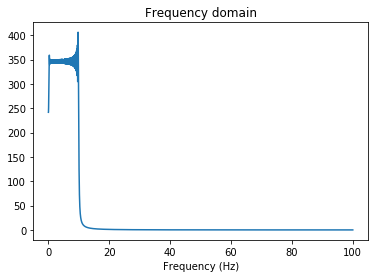

In [6]:
plt.clf()
plt.title('Frequency domain')
plt.plot(freq, np.abs(fft))
plt.xlabel('Frequency (Hz)')

### Multiple FFTs

Let's plot the FFT of just one portion of this signal. This part of the signal is relatively low frequency and we can see that in the frequency domain as well.

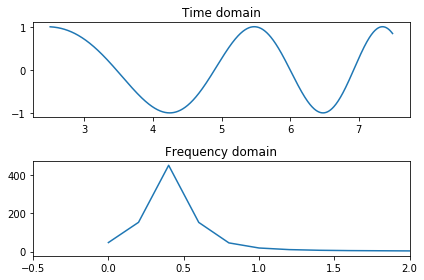

In [7]:
seg = sig[500:1500]
fft = np.fft.rfft(seg)
freq = np.fft.rfftfreq(len(seg), 1/fs)
plt.clf()
plt.subplot(2, 1, 1)
plt.title('Time domain')
plt.plot(ts[500:1500], seg)
plt.subplot(2, 1, 2)
plt.title('Frequency domain')
plt.plot(freq, np.abs(fft))
plt.xlim(-0.5, 2)
plt.tight_layout()

We can repeat this process for the entire signal -- continually taking small windows of the entire signal and computing the FFT on just that window.

In [8]:
window_len = 1000
window_shift = 100
freq = np.fft.rfftfreq(window_len, 1/fs)
stft = []
for i in range(0, len(sig) - window_len, window_shift):
    seg = sig[i: i + window_len]
    fft = np.fft.rfft(seg)
    stft.append(np.abs(fft))
stft = np.array(stft).T

We can stack this short Fourier transforms together into a matrix where each column is one FFT from one segment of the waveform. This is called the [Short-Time Fourier Transform (STFT)](https://en.wikipedia.org/wiki/Short-time_Fourier_transform).

In [9]:
stft.shape

(501, 230)

We can use `imshow` to display a matrix as an image where a color displays the value of a cell.

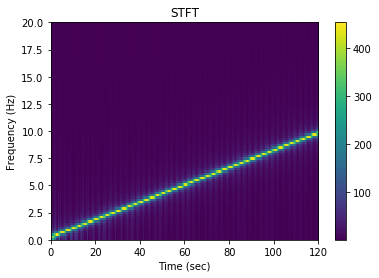

In [10]:
plt.clf()
plt.title('STFT')
plt.imshow(stft, extent=[0, T, freq[-1], freq[0]], aspect='auto')
plt.ylim((0, 20))
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()

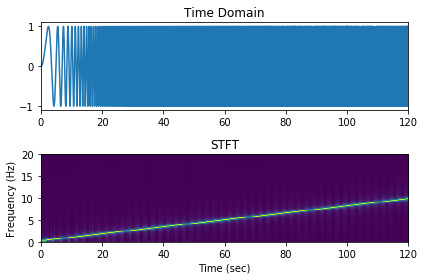

In [11]:
plt.figure()
plt.subplot(2,1,1)
plt.title('Time Domain')
plt.plot(ts, sig)
plt.xlim((0, T))
plt.subplot(2,1,2)
plt.title('STFT')
plt.imshow(stft, extent=[0, T, freq[-1], freq[0]], aspect='auto')
plt.ylim((0, 20))
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()

### Spectrogram

`matplotlib` has a convenient function that does this for us. By now you should know enough about the Fourier transform that you can figure out how to use it from the [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.specgram.html).

Text(0,0.5,'Frequency (Hz)')

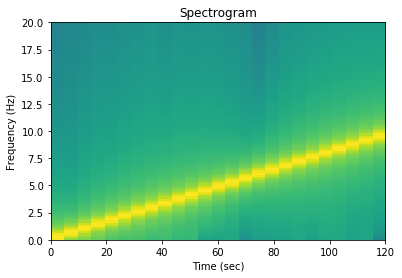

In [12]:
plt.clf()
plt.title('Spectrogram')
plt.specgram(sig, Fs=fs, NFFT=1000, noverlap=75, xextent=((0, T)))
plt.ylim((0, 20))
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')